In [155]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import special
from sklearn.datasets import make_blobs
import time
import scipy.stats as stats

In [205]:
# Set Parameters
n_samples = 1000000
num_bins = 20

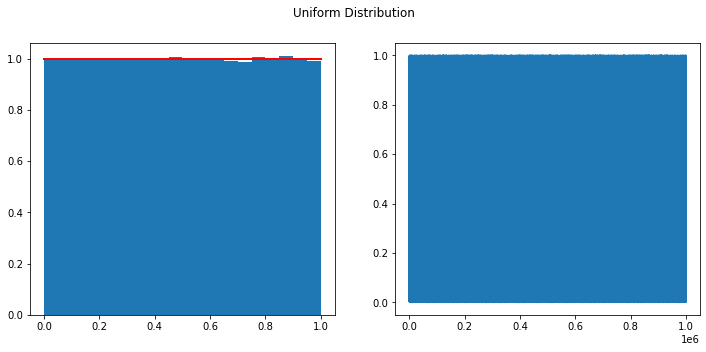

In [206]:
# Create uniform distribution
def uniform_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    sample_uniform = (np.random.uniform(low,high,n_samples))
    if display==True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform)
    return sample_uniform

sample_uniform=uniform_distribution()

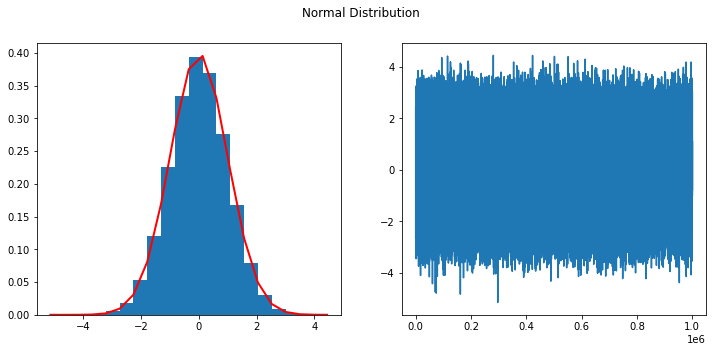

In [207]:
def normal_distribution(n_samples=n_samples, num_bins=num_bins, display = True, mu=0., sigma=1.):
    # Normal distribution
    sample_normal = np.random.normal(mu, sigma, n_samples)
    if display == True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Normal Distribution')
        count, bins, ignored = ax1.hist(sample_normal, num_bins, density=True)
        ax1.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                       np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
                 linewidth=2, color='r')
        ax2.plot(sample_normal)
    return sample_normal

sample_normal = normal_distribution()

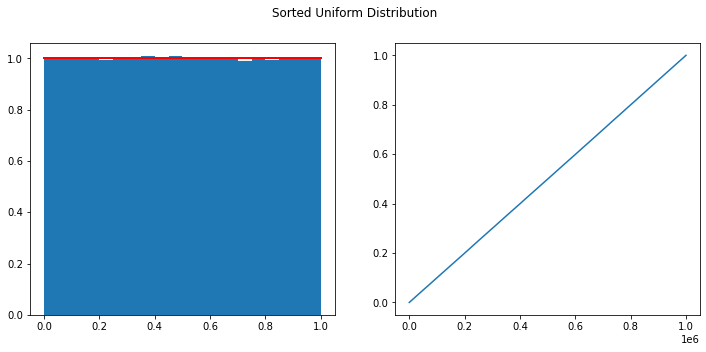

In [208]:
def uniform_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    #Sorted Uniform distribution
    sample_uniform_sorted = np.sort(np.random.uniform(low,high,n_samples))
    if display == True:
        #Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_sorted)
    return sample_uniform_sorted
sample_uniform_sorted = uniform_sorted_distribution()

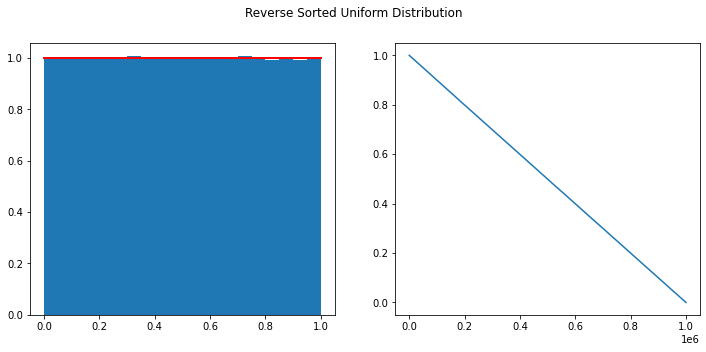

In [209]:
def uniform_reverse_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1.):
    # Reverse Sorted Uniform distribution
    sample_uniform_reverse_sorted = np.sort(np.random.uniform(low,high,n_samples))[::-1]
    if display == True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Reverse Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_reverse_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_reverse_sorted)
    return sample_uniform_reverse_sorted
sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution()

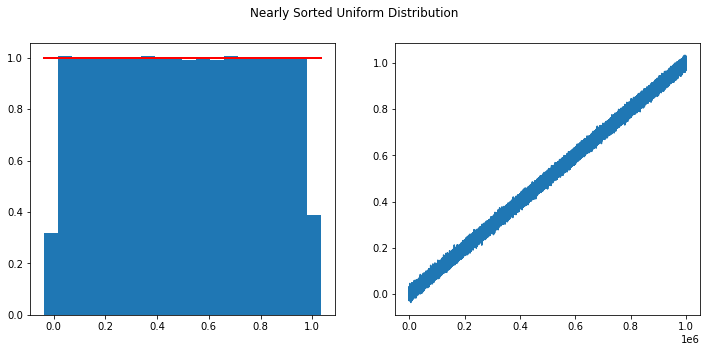

In [210]:
def uniform_nearly_sorted_distribution(n_samples=n_samples, num_bins=num_bins, display = True, low=0., high=1., mean_noise= 0., std_noice = 0.01):
    # Nearly Uniform distribution
    sample_uniform_nearly_sorted = np.sort(np.random.uniform(low,high,n_samples))
    noise = np.random.normal(mean_noise,std_noice,n_samples)
    sample_uniform_nearly_sorted = sample_uniform_nearly_sorted + noise
    if display==True:
        #Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('Nearly Sorted Uniform Distribution')
        count, bins, ignored = ax1.hist(sample_uniform_nearly_sorted, num_bins, density=True)
        ax1.plot(bins, np.ones_like(bins), linewidth=2, color='r')
        ax2.plot(sample_uniform_nearly_sorted)
    return sample_uniform_nearly_sorted
sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution()

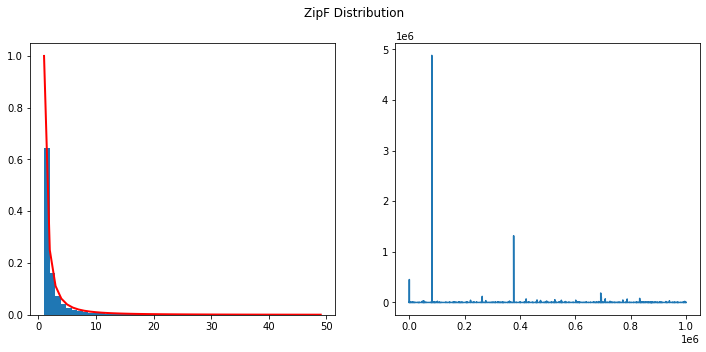

In [211]:
def zipf_distribution(n_samples=n_samples, num_bins=num_bins, display = True, a=2.):
    # ZipF Distribution
    sample_zipf = np.random.zipf(a, n_samples)
    if display==True:
        # Plot
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
        fig.suptitle('ZipF Distribution')
        count, bins, ignored = ax1.hist(sample_zipf[sample_zipf<50], 50, density=True)
        x = np.arange(1., 50.)
        y = x**(-a) / special.zetac(a)
        ax1.plot(x, y/max(y), linewidth=2, color='r')
        ax2.plot(sample_zipf)
    return sample_zipf
sample_zipf = zipf_distribution()

In [212]:
def create_df_distributions():
    sample_uniform=uniform_distribution(display=False)
    sample_normal = normal_distribution(display=False)
    sample_uniform_sorted = uniform_sorted_distribution(display=False)
    sample_uniform_reverse_sorted = uniform_reverse_sorted_distribution(display=False)
    sample_uniform_nearly_sorted = uniform_nearly_sorted_distribution(display=False)
    sample_zipf = zipf_distribution(display=False)
    df_distribions = pd.DataFrame().astype(np.float64)
    df_distribions["Uniform"] = sample_uniform
    df_distribions["Normal"] = sample_normal
    df_distribions["Uniform_Sorted"] = sample_uniform_sorted
    df_distribions["Uniform_Reverse_Sorted"] = sample_uniform_reverse_sorted
    df_distribions["Uniform_Nearly_Sorted"] = sample_uniform_nearly_sorted
    df_distribions["Zipf"] = sample_zipf
    return df_distribions

In [213]:
df_distribions = create_df_distributions()

In [214]:
df_distribions.head(5)

,Uniform,Normal,Uniform_Sorted,Uniform_Reverse_Sorted,Uniform_Nearly_Sorted,Zipf
0,0.540204,0.473874,0.000004,1.000000,0.001941,1
1,0.912948,2.771626,0.000004,0.999999,-0.008705,12
2,0.052719,-1.220341,0.000005,0.999999,0.000649,1
3,0.112381,-1.617350,0.000006,0.999999,0.005231,112
4,0.538874,-0.506938,0.000006,0.999998,0.008283,2


In [215]:
def evaluate_sorts(distribution="Uniform", repetitions=100):
    measures = pd.DataFrame().astype(np.float64)
    for sorting_algorithm in ["quicksort", "mergesort", "heapsort"]:
        algorithm_times = []
        for i in range(repetitions):
            df_distribions = create_df_distributions()
            #print(df_distribions["Uniform"].head(3)) # are the always different?
            start_time = time.time()
            df_distribions[distribution].sort_values(kind=sorting_algorithm)
            exeuction_time = (time.time() - start_time)
            algorithm_times.append(exeuction_time)
        measures[sorting_algorithm] = algorithm_times
        print("The time of",sorting_algorithm, "is", np.mean(algorithm_times), "seconds")
    return measures

In [216]:
print("Uniform")
df_uniform = evaluate_sorts(distribution="Uniform")

Uniform
The time of quicksort is 0.16707046031951905 seconds
The time of mergesort is 0.18521175146102906 seconds
The time of heapsort is 0.39603614568710327 seconds


In [217]:
print("Normal")
df_normal = evaluate_sorts(distribution="Normal")

Normal
The time of quicksort is 0.1805625343322754 seconds
The time of mergesort is 0.1971043610572815 seconds
The time of heapsort is 0.39835099935531615 seconds


In [218]:
print("Uniform_Sorted")
df_uniform_sorted = evaluate_sorts(distribution="Uniform_Sorted")

Uniform_Sorted
The time of quicksort is 0.041400666236877444 seconds
The time of mergesort is 0.030337002277374268 seconds
The time of heapsort is 0.09343385457992553 seconds


In [219]:
print("Uniform_Reverse_Sorted")
df_uniform_reverse_sorted = evaluate_sorts(distribution="Uniform_Reverse_Sorted")

Uniform_Reverse_Sorted
The time of quicksort is 0.049735901355743406 seconds
The time of mergesort is 0.03146262168884277 seconds
The time of heapsort is 0.1035062861442566 seconds


In [220]:
print("Uniform_Nearly_Sorted")
df_uniform_nearly_sorted = evaluate_sorts(distribution="Uniform_Nearly_Sorted")

Uniform_Nearly_Sorted
The time of quicksort is 0.11031619548797607 seconds
The time of mergesort is 0.1263422679901123 seconds
The time of heapsort is 0.19420695543289185 seconds


In [221]:
print("Zipf")
df_zipf = evaluate_sorts(distribution="Zipf")

Zipf
The time of quicksort is 0.05592010498046875 seconds
The time of mergesort is 0.08883432149887086 seconds
The time of heapsort is 0.10177711248397828 seconds


In [253]:
def calculate_stats(df_dist, sort_algo):
    df_sort_algo = df_dist[sort_algo]
    std_sort_algo = np.std(df_sort_algo) 
    mean_sort_algo = np.mean(df_sort_algo) 
    return df_sort_algo, std_sort_algo,mean_sort_algo

def plot_runtimes(sort_dist, std_sort_algo, mean_sort_algo, title, algo):
    # Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    fig.suptitle(title)
    count, bins, ignored = ax1.hist(sort_dist, 10, density=True)
    #ax1.plot(bins, 1/(std_sort_algo * np.sqrt(2 * np.pi)) *
    #               np.exp( - (bins - mean_sort_algo)**2 / (2 * std_sort_algo**2) ),
    #         linewidth=2, color='r')
    ax2.plot(sort_dist)
    print("Standard deviation for", algo,  "is: ", np.round(std_sort_algo,6))

Standard deviation for quicksort is:  0.021626
Standard deviation for mergesort is:  0.021606
Standard deviation for heapsort is:  0.0582


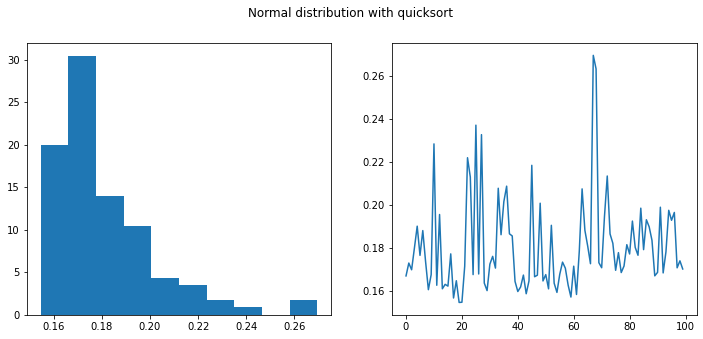

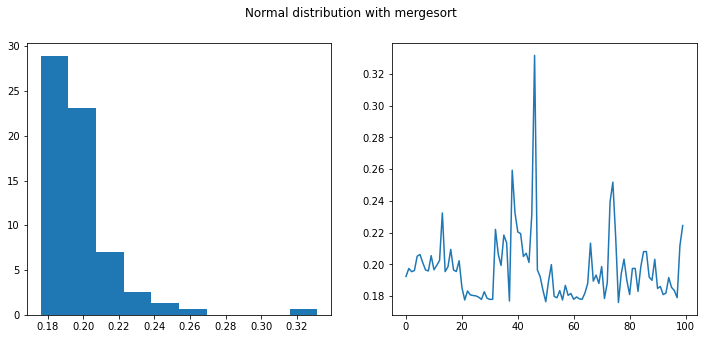

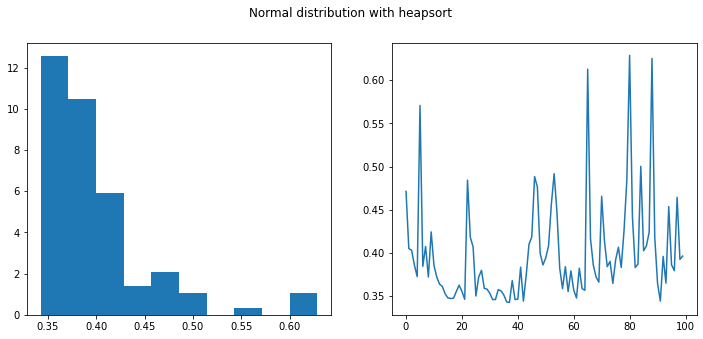

In [254]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_normal, algo)
    title = "Normal distribution with " + algo
    plot_runtimes(df,std,mean, title, algo)

Standard deviation for quicksort is:  0.020667
Standard deviation for mergesort is:  0.011934
Standard deviation for heapsort is:  0.059686


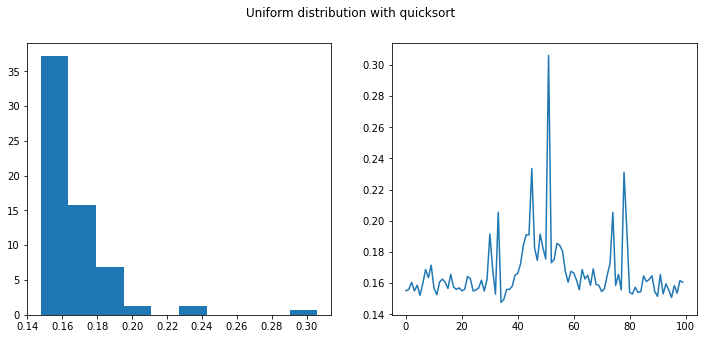

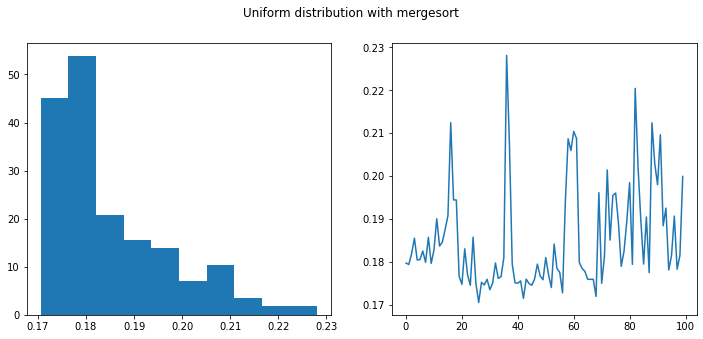

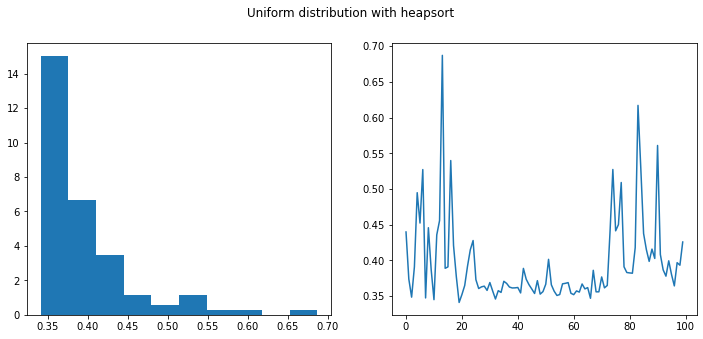

In [255]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform, algo)
    title = "Uniform distribution with " + algo
    plot_runtimes(df,std,mean, title, algo)

Standard deviation for quicksort is:  0.002751
Standard deviation for mergesort is:  0.002464
Standard deviation for heapsort is:  0.003996


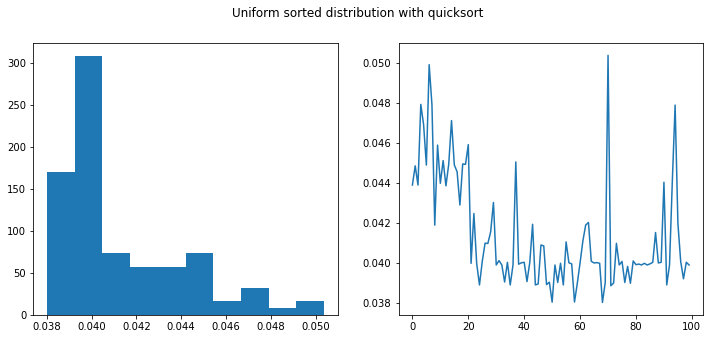

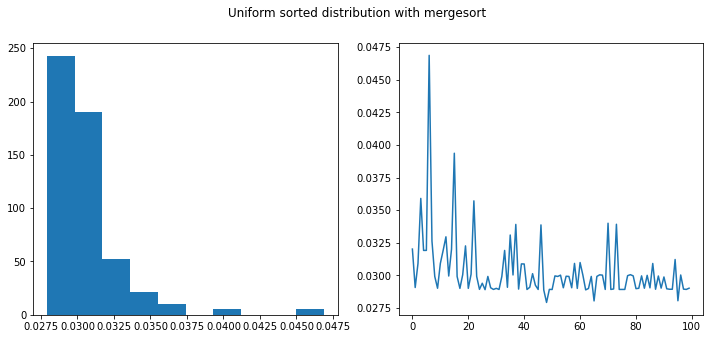

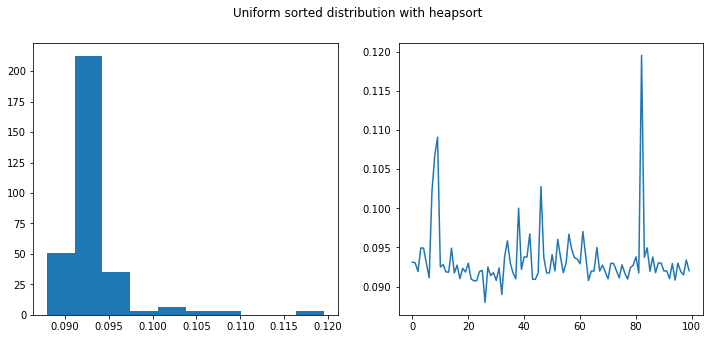

In [256]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_sorted, algo)
    title = "Uniform sorted distribution with " + algo
    plot_runtimes(df,std,mean, title, algo)

Standard deviation for quicksort is:  0.003103
Standard deviation for mergesort is:  0.002676
Standard deviation for heapsort is:  0.004343


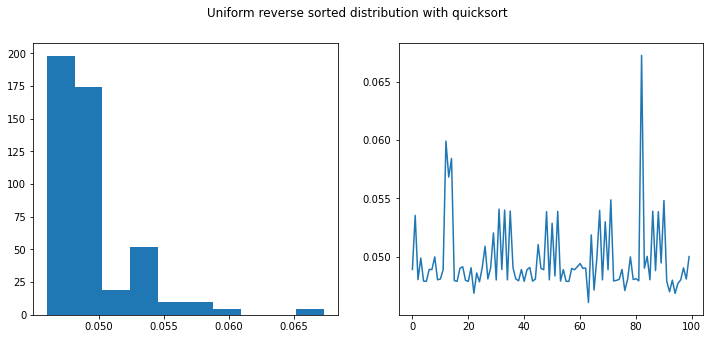

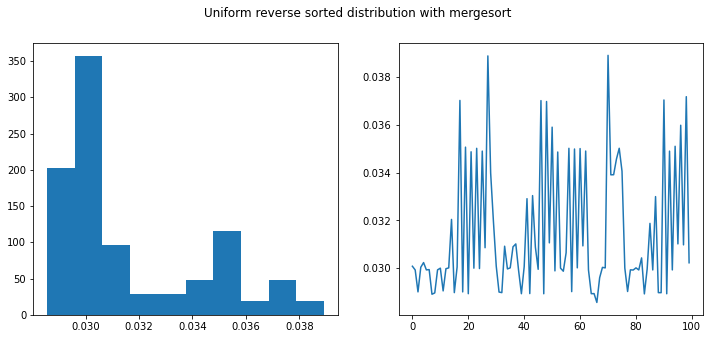

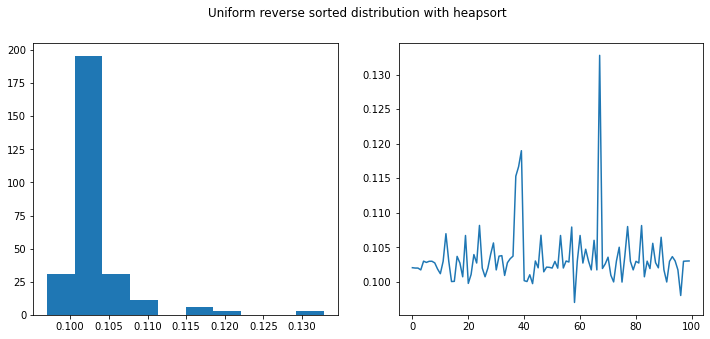

In [257]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_reverse_sorted, algo)
    title = "Uniform reverse sorted distribution with " + algo
    plot_runtimes(df,std,mean, title, algo)

Standard deviation for quicksort is:  0.003456
Standard deviation for mergesort is:  0.004162
Standard deviation for heapsort is:  0.006543


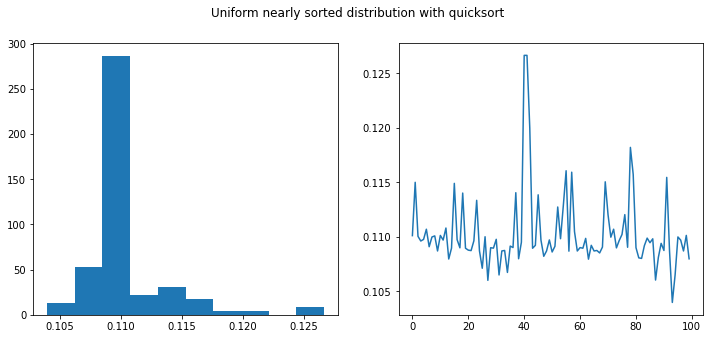

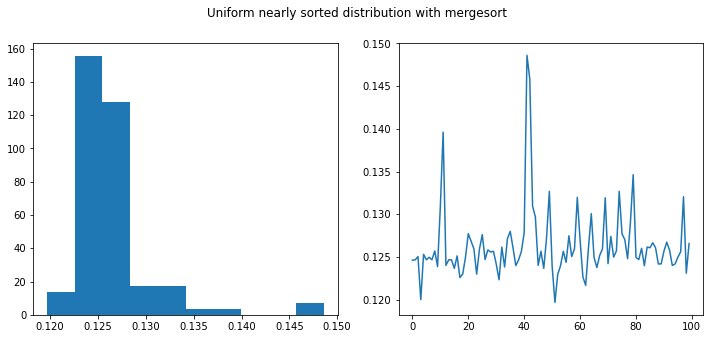

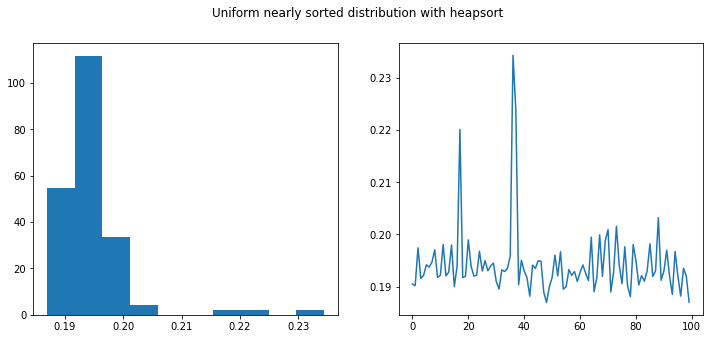

In [258]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_uniform_nearly_sorted, algo)
    title = "Uniform nearly sorted distribution with " + algo
    plot_runtimes(df,std,mean, title, algo)

Standard deviation for quicksort is:  0.003115
Standard deviation for mergesort is:  0.003397
Standard deviation for heapsort is:  0.028585


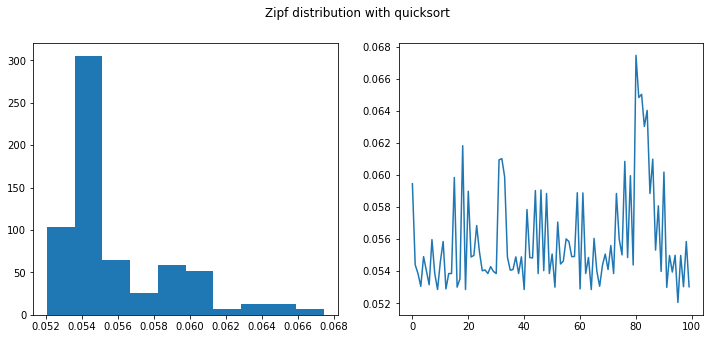

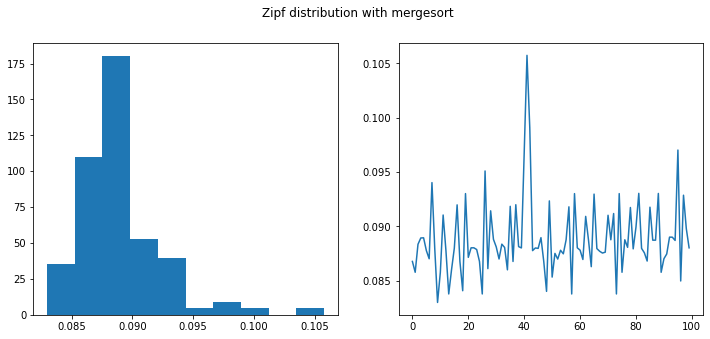

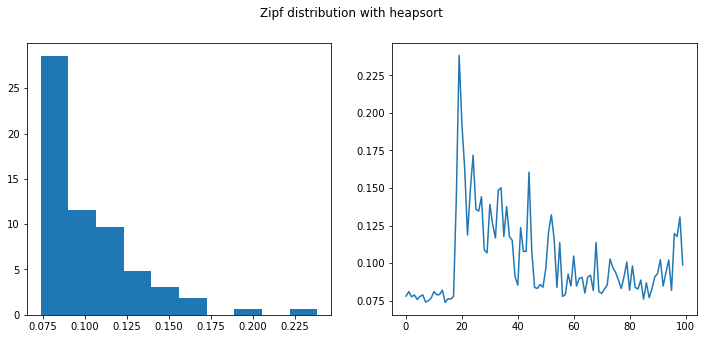

In [259]:
for algo in ["quicksort", "mergesort", "heapsort"]:
    df, std, mean = calculate_stats(df_zipf, algo)
    title = "Zipf distribution with " + algo
    plot_runtimes(df,std,mean, title, algo)